<a href="https://colab.research.google.com/github/aescobar71/Proyecto-Final-Data-Science/blob/main/Entrega_11_%22Desaf%C3%ADo_Evaluaci%C3%B3nML_Andr%C3%A9sFelipe_EscobarM%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: Andrés Felipe Escobar Mosquera**

**Comisión 49175**

**Data Science**


# **Décima Primera Entrega: Evaluando modelos de Machine Learning**

# **1. Presentación del Proyecto**

**Abstracto**

Poder establecer el precio de venta de un vehículo para ser competitivo va a depender de las características propias del mismo, pero también de las opciones que ofrece el mercado automotriz.

Australia presenta un mercado próspero y competitivo en dicha materia, con una gran selección de automóviles para satisfacer diversas demandas y gustos. Es así como, algunas marcas se han destacado repetidamente por presentar los vehículos más vendidos del pais. El rendimiento, la confiabilidad y las características del vehículo en general son algunos de los elementos que han contribuido al éxito de estas ventas.

El modelo de auto más vendido en Australia en 2023 fue el Toyota Hilux, con 32.763 vehículos vendidos, seguido por la Ford Ranger en segunda posición con 31.884 vehículos vendidos. El MG ZS de MG (marca China) consiguió la tercera posición, vendiendo 17.431 vehículos, lo que supone un impresionante aumento interanual de 1.68 veces, superando al eterno éxito de ventas, el Toyota RAV4.**

El conjunto de datos elegido contiene la información más reciente sobre los precios de vehículos en Australia para el año 2023. También se incluyen diversos aspectos importantes para el mercado automotriz, que se describen más adelante, y que proporcionan información útil sobre las tendencias y los factores que influyen en los precios de los vehículos.

El presente proyecto busca definir un modelo que permita estimar el precio de venta de un vehículo con base a las características que más influyen en ello.





** Tomado de: https://www.autouserguide.com/es/Blogs/Revisi%C3%B3n-de-expertos-de-los-diez-autos-m%C3%A1s-vendidos-en-Australia-en-2023/

Los siguientes son detalles de las columnas mas importantes del set de datos:  

- Brand (Marca): es el nombre del fabricante del vehículo.

- Year (Año): se refiere al año de fabricación o lanzamiento.

- Model (Modelo): Nombre o código del modelo del vehiculo.

- UsedOrNew (Usado/Nuevo): se refiere a la condición del vehiculo (usado o nuevo).

- Transmission (Transmisión): define el tipo de transmisión (manual, o automática).

- Engine (Motor): Refiere la capacidad del motor (en litros o KW).

- DriveType (Tipo de Tracción): Define el tipo de tracción del vehículo.

- FuelType (Tipo de combustible): indica el combustible que usa el vehículo (gasolina, diesel, hibrido o eléctrico)

- FuelConsumtion (Consumo de combustible): establece el consumo de combustible en litros / 100 Km.

- Kilometres (Kilometraje): Se refiere a la distancia recorrida por el veículo.

- Location (Ubicación): Ubicación del vehículo (ciudad y estado).

- CylindersinEngine (Cilindros del Motor): indica la cantidad de cilindros que presenta el motor del vehículo.

- BodyType (Tipo de Cuerpo o forma): Se refiere a la forma del vehículo.

- Doors (Puertas): Indica el número de puertas del vehículo.

- Seats (Asientos): Indica el número de asientos del vehículo.

- Price (Precio): Precio del auto (dado en dolares australianos).

**Objetivo**

Definir un modelo que permita estimar el precio de venta de un vehículo con base a las variables que presenta. Para ello, utilizaremos algoritmos de aprendizaje supervisado, más precisamente, algoritmos de regresión, ya que permiten predecir valores continuos (el Precio del vehículo, en este caso).

# **2. Lectura de datos y chequeo inicial**

**Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

**Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
import os
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Lectura del dataset**

Vamos a tomar el dataset trabajado en la segunda entrega del proyecto final, el cual se puede desacargar ya limpio después del análisis multivariado.

In [ ]:
%cd '/content/gdrive/MyDrive/Data Science/Proyecto Final/Colab Notebooks/Bases de Datos'
df= pd.read_excel('Vehículos_Australia_clean2_df.xlsx')

/content/gdrive/MyDrive/Data Science/Proyecto Final/Colab Notebooks/Bases de Datos


**Análisis inicial del dataset**

In [ ]:
df.head()

,Unnamed: 0,Year,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
0,0,2022,2,0,AWD,Diesel,5595,SUV,4,7,51990,Marca de Corea del Sur,Motor Estandar,Consumo Medio,NSW
1,1,2022,0,0,Front,Premium,16,Hatchback,5,5,19990,Marca China,Motor Estandar,Consumo Medio,NSW
2,2,2022,0,0,Rear,Premium,8472,Coupe,2,4,108988,Marca Alemana,Motor Estandar,Consumo Medio,NSW
3,3,2011,0,0,Rear,Premium,136517,Coupe,2,4,32990,Marca Alemana,Motor Grande,Consumo Alto,NSW
4,4,2022,0,0,Front,Unleaded,1035,SUV,4,5,34990,Marca Francesa,Motor Estandar,Consumo Medio,NSW


In [ ]:
df.tail()

,Unnamed: 0,Year,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
16561,16577,2014,0,0,Front,Unleaded,66000,Commercial,4,7,29500,Marca Japonesa,Motor Estandar,Consumo Medio,QLD
16562,16578,2012,0,0,Rear,Diesel,117432,Desconocido,4,5,39888,Marca Alemana,Motor Estandar,Consumo Medio,VIC
16563,16579,2022,2,0,Front,Unleaded,5165,SUV,4,5,35280,Marca Japonesa,Motor Estandar,Consumo Medio,QLD
16564,16580,2016,0,0,AWD,Premium,85525,SUV,4,5,41888,Marca Alemana,Motor Estandar,Consumo Medio,QLD
16565,16581,2021,0,0,Rear,Unleaded,31852,Sedan,4,5,65888,Marca Alemana,Motor Estandar,Consumo Medio,QLD


In [ ]:
df.shape

(16566, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16566 entries, 0 to 16565
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      16566 non-null  int64 
 1   Year            16566 non-null  int64 
 2   UsedOrNew       16566 non-null  int64 
 3   Transmission    16566 non-null  int64 
 4   DriveType       16566 non-null  object
 5   FuelType        16566 non-null  object
 6   Kilometres      16566 non-null  int64 
 7   BodyType        16566 non-null  object
 8   Doors           16566 non-null  int64 
 9   Seats           16566 non-null  int64 
 10  Price           16566 non-null  int64 
 11  Brand           16566 non-null  object
 12  Engine          16566 non-null  object
 13  FuelConsumtion  16566 non-null  object
 14  State           16566 non-null  object
dtypes: int64(8), object(7)
memory usage: 1.9+ MB


# **3. Segundo Feature Engineering**

Vamos a generar una nueva columna, llamada "Age" ("edad del vehículo") con el fin de incrementar nuestras variables independientes en el modelo. Ésta se calcula como "Año Actual - Año (de fabricación):

In [ ]:
df['Age'] = 2024 - df['Year']

Ahora miremos la interacción entre la variable "Kilometres" y la variable "Age", recien creada:

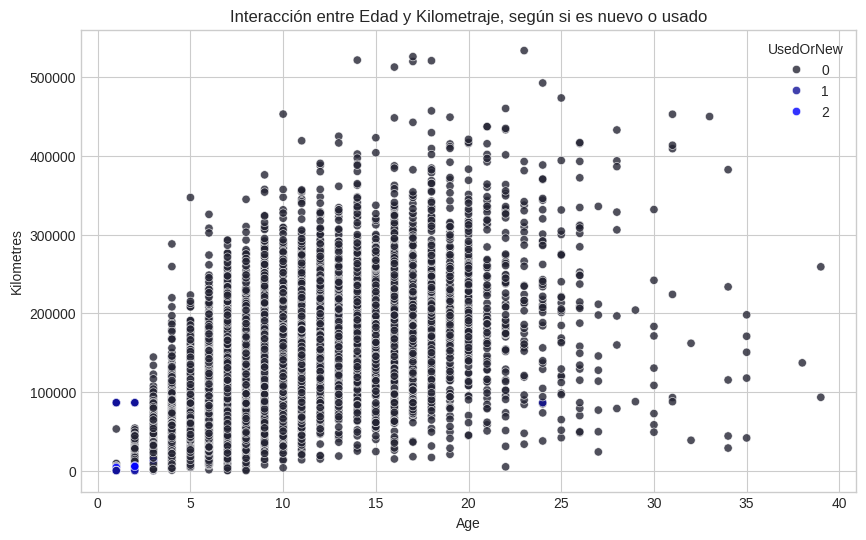

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Kilometres', hue= 'UsedOrNew', alpha=0.8, palette='dark:blue')
plt.title('Interacción entre Edad y Kilometraje, según si es nuevo o usado')
plt.xlabel('Age')
plt.ylabel('Kilometres')
plt.show()

Se aprecia una mayor concentración de los datos para el caso de los vehículos que presentan una edad menor de 30 años. Por ahora vamos a conservar todos los datos con el fin de poder comparar los resultados obtenidos con los del desafío anterior.
  

# **4. Encoding**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Ahora codificamos las variables categóricas y numéricas:

In [ ]:
categorical_features = ['DriveType', 'FuelType', 'BodyType', 'Brand', 'Engine',
 'FuelConsumtion', 'State']

numerical_features = ['Year', 'UsedOrNew', 'Transmission', 'Age', 'Kilometres', 'Doors', 'Seats']

Separamos las características y etiquetas

In [ ]:
X = df[categorical_features + numerical_features]
y = df['Price']

Vamos a utilizar un pipeline para encodear las variables categóricas y para reescalar las variables numéricas:

Preprocesamiento para ambos tipos de variables:

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

Finalmente, dividimos el dataset en conjunto de entrenamiento y prueba:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **5. Entrenamiento de un modelo de Machine Learning**

Modelos a utilizar:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Definimos la función para entrenar y evaluar cada uno de los modelos:

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

Entrenamiento y evaluación de los modelos:

In [ ]:
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'RAE': rae,
        'R2': r2,
        'R2_ajustado': r2_adjusted
    }


In [ ]:
# Mostrar resultados
results_df = pd.DataFrame(results).T
print(results_df)

                                 MSE          RMSE           MAE       MAPE  \
Linear Regression       4.365425e+08  20893.599453  11945.913142  48.095551   
Random Forest           2.372047e+08  15401.450238   6906.812079  19.988999   
Support Vector Machine  1.055410e+09  32487.080440  17772.108881  61.155546   

                             RAE        R2  R2_ajustado  
Linear Regression       0.618384  0.569998     0.568173  
Random Forest           0.357533  0.766349     0.765358  
Support Vector Machine  0.919979 -0.039598    -0.044010  


Con respecto a la entrega anterior, vemos que la mejora en los valores de las métricas MSE,RMSE y MAE es mínima en el caso del Modelo Random Forest (el que mejor Performance tiene) y del modelo de Regresión lineal. Para el caso del modelo SVM con la adición de la nueva categoria 'Age' y el nuevo preprocesamiento, el desempeño de este modelo es mucho peor.  

Miremos algunas gráficas de los Resultados de este nuevo modelado:

In [ ]:
results = {
    'Linear Regression': {
        'MSE': 4.365425e+08,
        'RMSE': 20893.599453,
        'MAE': 11945.913142,
        'MAPE': 48.095551,
        'RAE': 0.618384,
        'R2': 0.569998,
        'R2_ajustado': 0.568173
    },
    'Random Forest': {
        'MSE': 2.372047e+08,
        'RMSE': 15401.450238,
        'MAE': 6906.812079,
        'MAPE': 19.988999,
        'RAE': 0.357533,
        'R2': 0.766349,
        'R2_ajustado': 0.765358
    },
    'Support Vector Machine': {
        'MSE': 1.055410e+09,
        'RMSE': 32487.080440,
        'MAE': 17772.108881,
        'MAPE': 61.155546,
        'RAE': 0.919979,
        'R2': -0.039598,
        'R2_ajustado': -0.044010
    }
}

Convertimos los resultados a un DataFrame

In [ ]:
results_df = pd.DataFrame(results).T

Realizamos un gráfico de barras para comparar las métricas

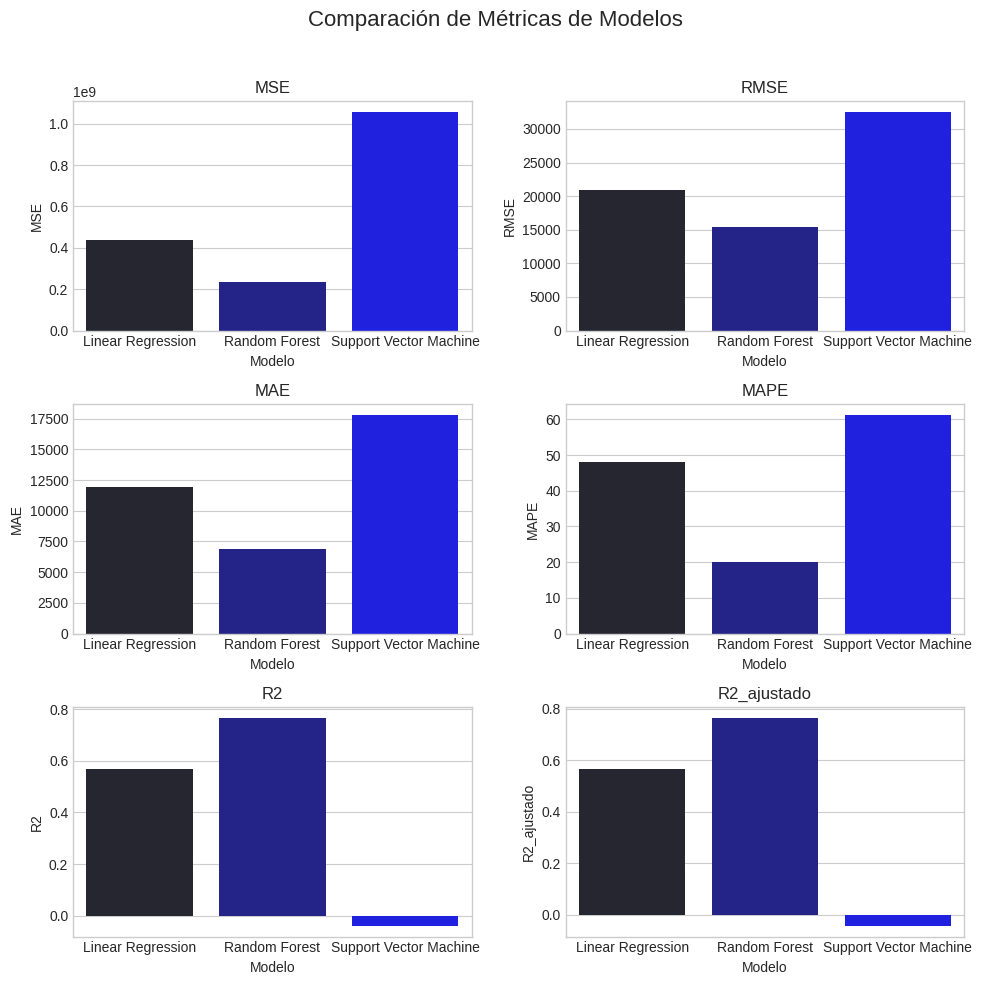

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Comparación de Métricas de Modelos', fontsize=16)

metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'R2_ajustado']

for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette='dark:blue')
    ax.set_title(metric)
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Con respecto al MSE, RMSE, MAE, MAPE y RAE el modelo de Random Forest tiene los valores más bajos, lo que indica un mejor desempeño de este modelo. Seguido por la Linear Regression, y el Support Vector Machine (SVM), que tiene el peor desempeño. Para el caso del R2 y R2_ajustado, también el modelo de Random Forest presenta el mejor valor, ya que los resultados son más cercanos a uno. En conclusión, el modelo de Random Forest ha superado a los otros modelos en todas las métricas, seguido por la Linear Regression, y el Support Vector Machine tiene el peor desempeño.

Realicemos un Gráfico de dispersión para comparar valores reales vs. predichos

In [ ]:
# Diccionario para almacenar los pipelines y las predicciones
pipelines = {}
y_preds = {}

In [ ]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    pipelines[name] = pipeline
    y_preds[name] = y_pred

# Obtener predicciones para cada modelo
y_pred_lr = y_preds['Linear Regression']
y_pred_rf = y_preds['Random Forest']
y_pred_svr = y_preds['Support Vector Machine']

Ahora genero el gráfico de Dispersión:

In [ ]:
def scatter_plot_comparison(model, y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title(f'Valores Reales vs. Predichos ({model})')
    plt.show()

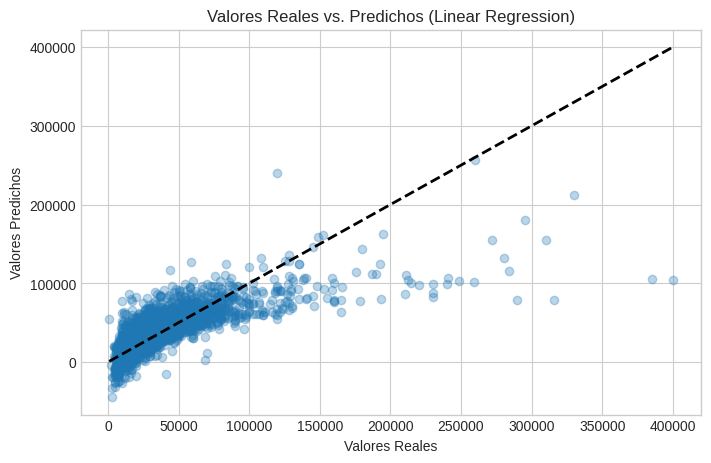

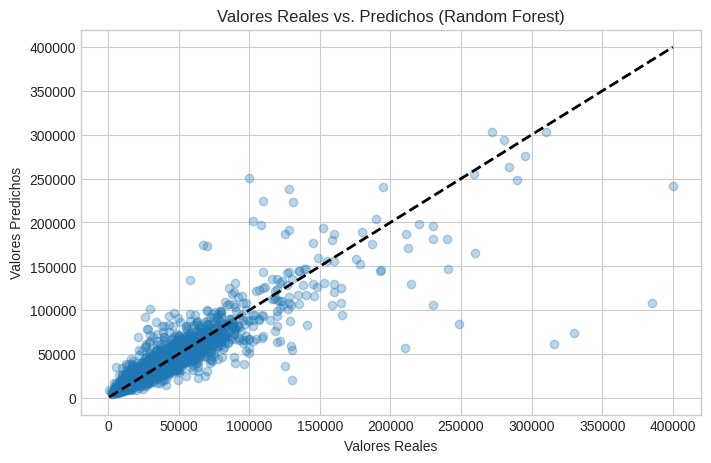

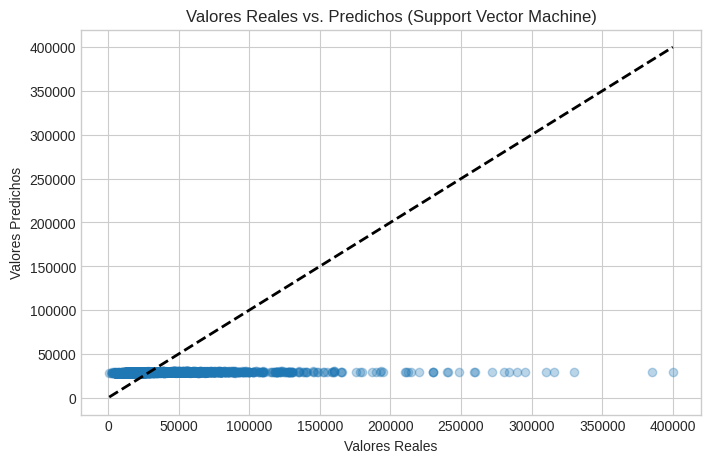

In [ ]:
scatter_plot_comparison('Linear Regression', y_test, y_pred_lr)
scatter_plot_comparison('Random Forest', y_test, y_pred_rf)
scatter_plot_comparison('Support Vector Machine', y_test, y_pred_svr)

Finalmente genero el Gráfico de Residuos:

In [ ]:
def residuals_plot(model, y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel('Residuos')
    plt.ylabel('Frecuencia')
    plt.title(f'Gráfico de Residuos ({model})')
    plt.show()

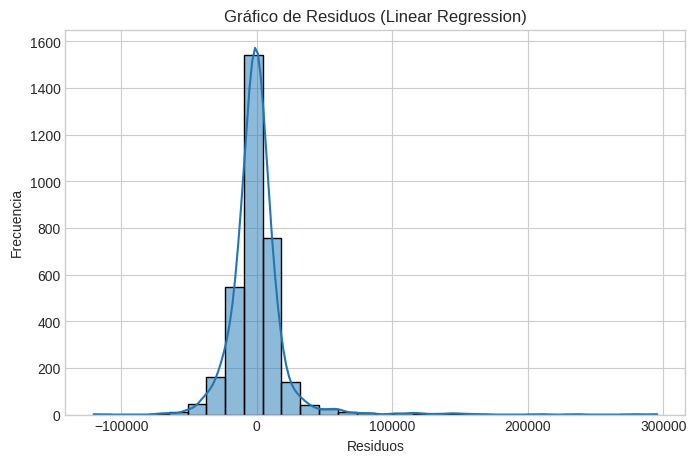

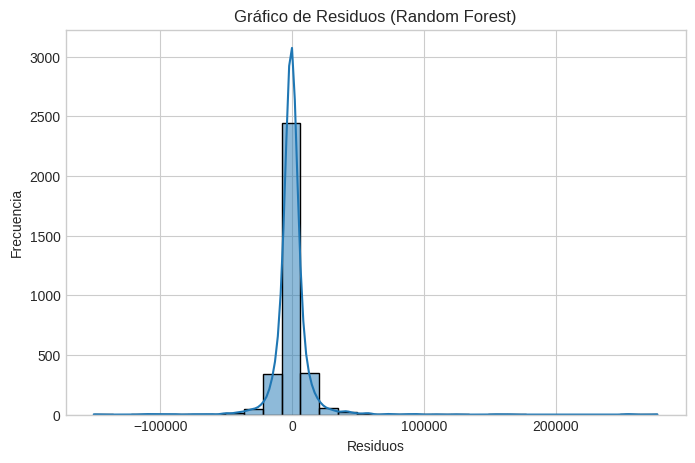

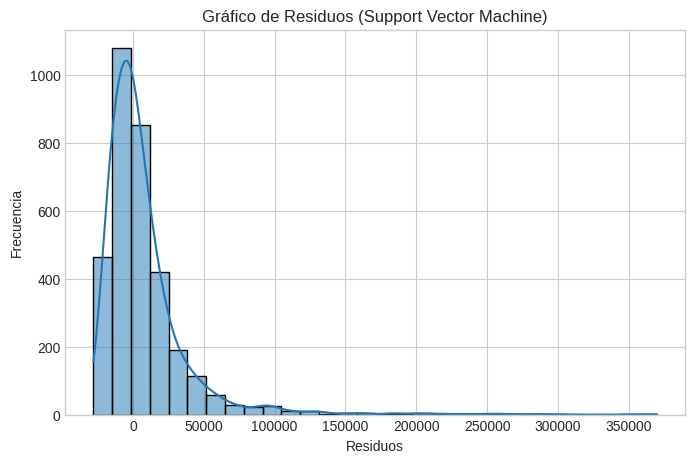

In [ ]:
residuals_plot('Linear Regression', y_test, y_pred_lr)
residuals_plot('Random Forest', y_test, y_pred_rf)
residuals_plot('Support Vector Machine', y_test, y_pred_svr)

En conclusión el modelo de Random Forest presenta el mejor performance de los 3, mostrando en el gráfico de dispersión una distribución un poco más uniforme de los datos a cada lado de la línea de referencia. Y en el gráfico de residuos, se aprecia que la distribución está más centrada al rededor de cero, aunque con una proyección mayor al lado derecho, lo que indica una tendencia a errores positivos, por tanto, predice valores de precio mayores a los reales.